In [1]:
# skin detection.
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    ycrcb = cv2.cvtColor(frame, cv2.COLOR_BGR2YCrCb)

    lower_skin = np.array([0, 133, 77], dtype=np.uint8)
    upper_skin = np.array([255, 173, 127], dtype=np.uint8)

    mask = cv2.inRange(ycrcb, lower_skin, upper_skin)
    kernel = np.ones((5,5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area < 4000 or area > 50000:
            continue

        x, y, w, h = cv2.boundingRect(cnt)
        aspect_ratio = w / h
        if not (0.75 < aspect_ratio < 1.5):
            continue
        cv2.putText(frame, "Skin Detected", (x+50, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 3)
    
    cv2.imshow('skin detection', frame)
    cv2.imshow('Mask', mask)

    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()

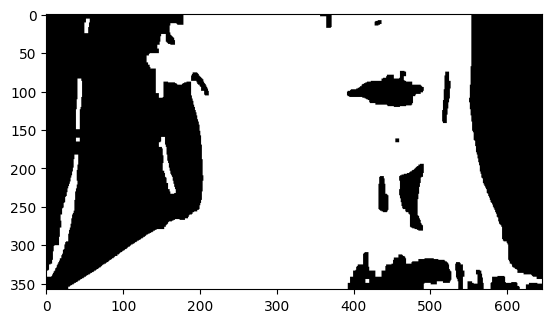

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("blemish.png")

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_cream = np.array([0, 50, 50])
upper_cream = np.array([20, 255, 255])

mask = cv2.inRange(hsv, lower_cream, upper_cream)
kernel = np.ones((5,5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
x, y, w, h = cv2.boundingRect(contours[0])
cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 3)
plt.imshow(mask, cmap='gray')